In [43]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt


In [44]:
data = pd.read_csv('ts_detached.csv', index_col=0)

In [45]:
data.head()

,Detached
Date,
1995-01-31,9473
1995-02-28,9667
1995-03-31,13431
1995-04-30,11929
1995-05-31,13169


In [46]:
# Convert the index to DateTime format
data.index = pd.to_datetime(df.index)

### DIFFERENCING THE DATASET TO BE STATIONARY

In [56]:
# Compute the first difference
diff = data.diff().dropna()

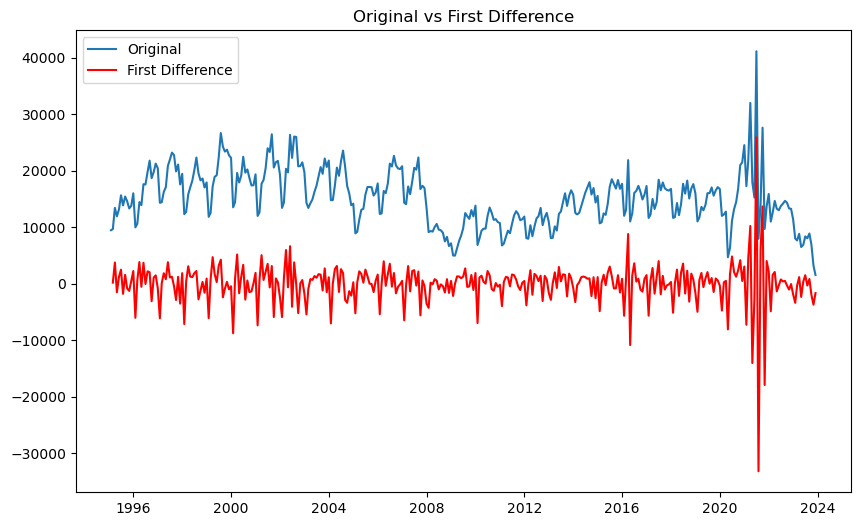

In [57]:
# Plot original and differenced time series
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data, label='Original')
plt.plot(diff, label='First Difference', color='red')
plt.title('Original vs First Difference')
plt.legend()
plt.show()

### P D Q DETECTION

In [58]:
# Set the number of lags to plot
n_lags = 20

In [59]:
# Calculate ACF and PACF coefficients
acf_values = acf(diff, nlags=n_lags)
pacf_values = pacf(diff, nlags=n_lags)

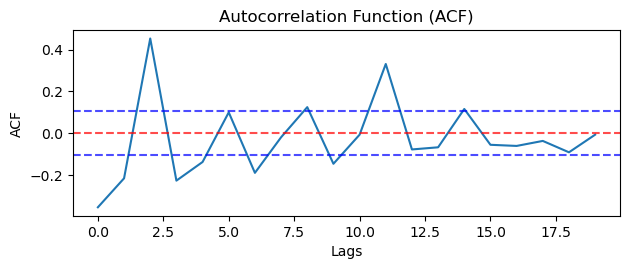

In [61]:
# Plot ACF
plt.subplot(211)  # Subplot 1 in a 2x1 grid
plt.plot(acf_values[1:])  # Exclude the first value (always 1)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)  # Reference line at y=0
plt.axhline(y=1.96/np.sqrt(len(diff)), color='blue', linestyle='--', alpha=0.7)  # Upper and lower bounds for significance
plt.axhline(y=-1.96/np.sqrt(len(diff)), color='blue', linestyle='--', alpha=0.7)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

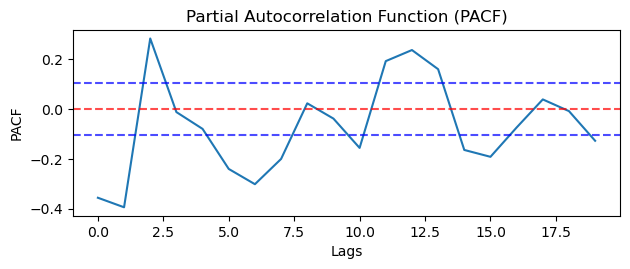

In [62]:
# Plot PACF
plt.subplot(212)  # Subplot 2 in a 2x1 grid
plt.plot(pacf_values[1:])  # Exclude the first value (always 1)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)  # Reference line at y=0
plt.axhline(y=1.96/np.sqrt(len(diff)), color='blue', linestyle='--', alpha=0.7)  # Upper and lower bounds for significance
plt.axhline(y=-1.96/np.sqrt(len(diff)), color='blue', linestyle='--', alpha=0.7)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()